# Baseball Case Study

**Problem Statement:**
    
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

# Importing required library

In [1]:
# Analysising libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,boxcox

# Machine Learning library

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# fetching the dataset

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')


   **Input features:**
   * R  - Runs
   * AB - At Bats
   * H  - Hits
   * 2B - Doubles
   * 3B - Triples
   * HR - Homeruns
   * BB - Walks
   * SO - Strikeouts
   * SB - Stolen Bases
   * RA - Run Allowed
   * ER - Earned Runs
   * ERA - Earned Run Average (ERA)
   * CG - Complete games ( referred online)
   * SHO - Shutouts
   * SV - Saves
   * E - Errors
   
   
  **Output features:**
   * W -Number of predicted wins (W)

# Renaming the columns for better understanding

In [4]:
df.rename(columns={"W" : "Wins", "R" : "Runs" , "AB" : "At_Bats", "H" : "Single", "2B" : "Doubles", "3B": "Triples", "HR": "Home_Runs", "BB": "Walks", "SO": "Stikeouts", "SB": "Stolen_Bases", "RA" : "Runs_Allowed", "ER": "Earned_Runs", "ERA":"Earned_Run_Average", "CG": "Complete_Games", "SHO": "Shutouts", "SV": "Saves", "E": "Errors"}, inplace=True)
df.head()

,Wins,Runs,At_Bats,Single,Doubles,Triples,Home_Runs,Walks,Stikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average,Complete_Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.shape

(30, 17)

In [6]:
df.dtypes

Wins                    int64
Runs                    int64
At_Bats                 int64
Single                  int64
Doubles                 int64
Triples                 int64
Home_Runs               int64
Walks                   int64
Stikeouts               int64
Stolen_Bases            int64
Runs_Allowed            int64
Earned_Runs             int64
Earned_Run_Average    float64
Complete_Games          int64
Shutouts                int64
Saves                   int64
Errors                  int64
dtype: object

We can see there are 30 rows and 17 columns in dataset.Out of 17 columns, there are 16 integer and 1 float column present in dataset and there is no categorical variable.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At_Bats             30 non-null     int64  
 3   Single              30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home_Runs           30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Stikeouts           30 non-null     int64  
 9   Stolen_Bases        30 non-null     int64  
 10  Runs_Allowed        30 non-null     int64  
 11  Earned_Runs         30 non-null     int64  
 12  Earned_Run_Average  30 non-null     float64
 13  Complete_Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

In [8]:
# Let's check whether there are any missing/NaN values in the dataset or not?
df.isnull().sum()

Wins                  0
Runs                  0
At_Bats               0
Single                0
Doubles               0
Triples               0
Home_Runs             0
Walks                 0
Stikeouts             0
Stolen_Bases          0
Runs_Allowed          0
Earned_Runs           0
Earned_Run_Average    0
Complete_Games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

<AxesSubplot:>

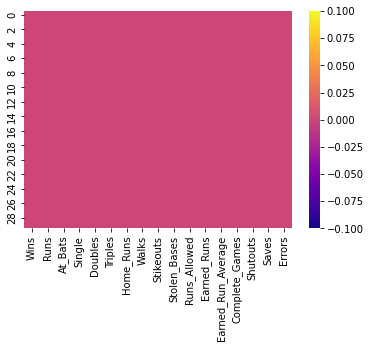

In [9]:
sns.heatmap(df.isnull(),cmap='plasma')

We can see that there are no null values in the given data set.

# EDA (Exploratory Data Analysis):

In [10]:
#statistical summary
df.describe()

,Wins,Runs,At_Bats,Single,Doubles,Triples,Home_Runs,Walks,Stikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average,Complete_Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Seems there is skewwness in the data.

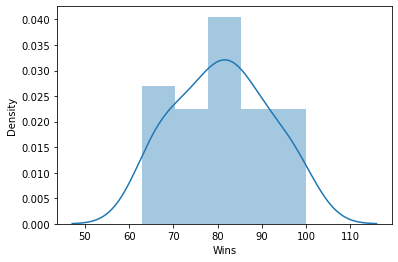

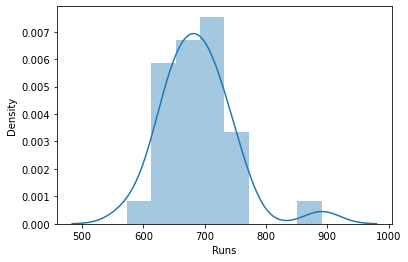

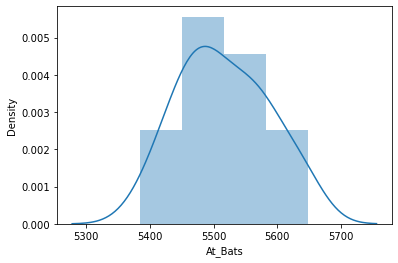

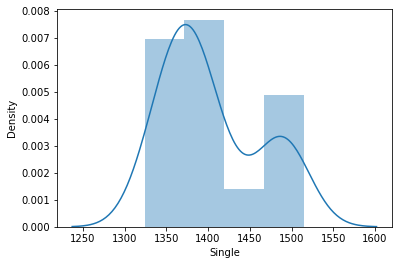

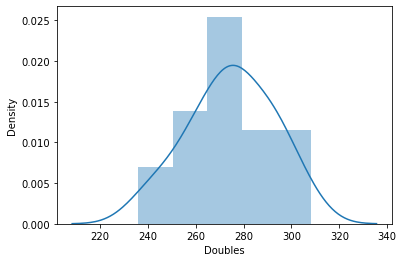

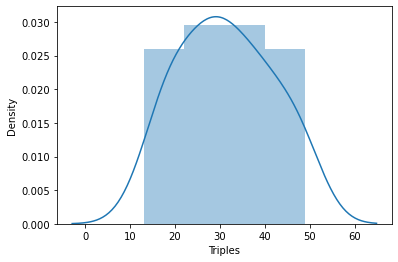

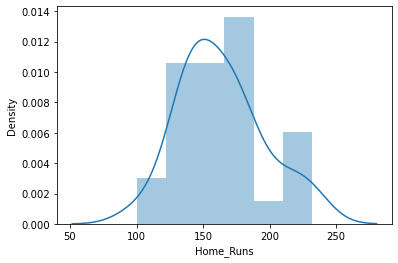

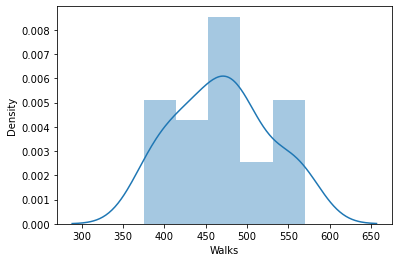

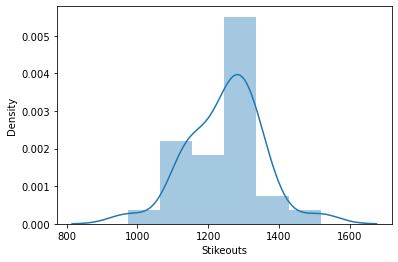

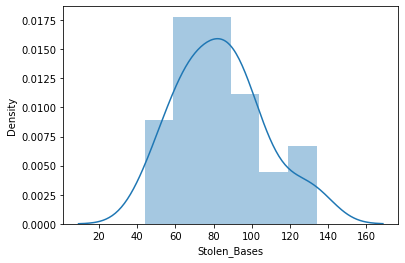

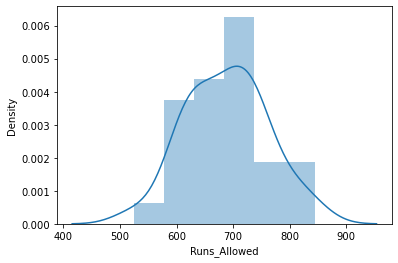

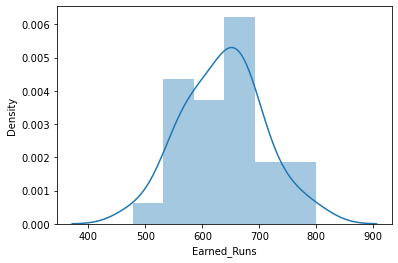

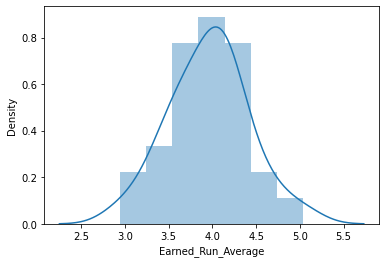

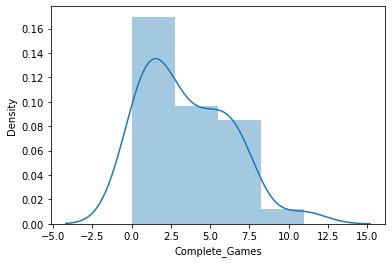

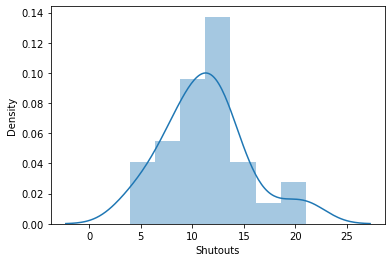

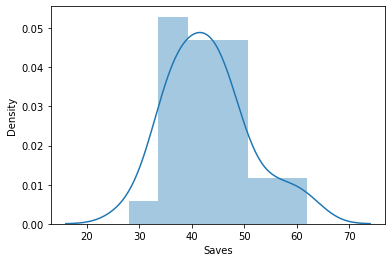

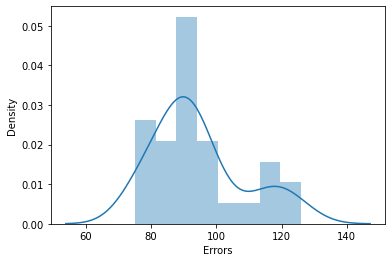

In [11]:
#Let's see the distribution for each column

for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

We can see skewness in few data points like Home Runs,Strikeouts,Complete_games,Shutouts etc

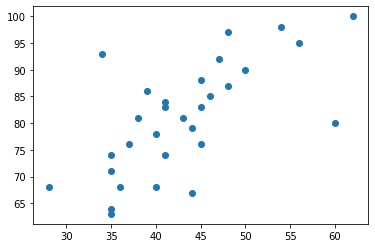

In [12]:
plt.scatter(x='Saves',y='Wins',data=df)
plt.show()

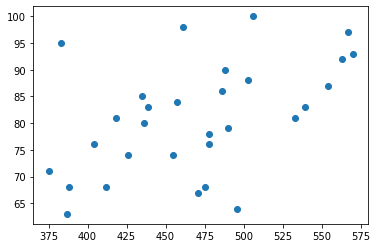

In [13]:
plt.scatter(x='Walks',y='Wins',data=df)
plt.show()

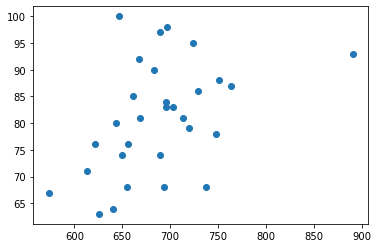

In [14]:
plt.scatter(x='Runs',y='Wins',data=df)
plt.show()

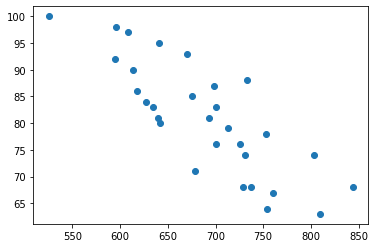

In [15]:
plt.scatter(x='Runs_Allowed',y='Wins',data=df)
plt.show()

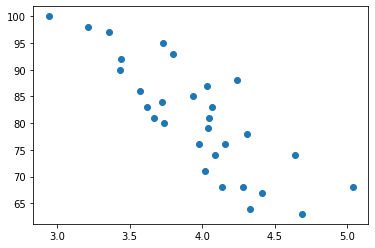

In [16]:
plt.scatter(x='Earned_Run_Average',y='Wins',data=df)
plt.show()

array([[<AxesSubplot:title={'center':'Wins'}>,
        <AxesSubplot:title={'center':'Runs'}>,
        <AxesSubplot:title={'center':'At_Bats'}>,
        <AxesSubplot:title={'center':'Single'}>],
       [<AxesSubplot:title={'center':'Doubles'}>,
        <AxesSubplot:title={'center':'Triples'}>,
        <AxesSubplot:title={'center':'Home_Runs'}>,
        <AxesSubplot:title={'center':'Walks'}>],
       [<AxesSubplot:title={'center':'Stikeouts'}>,
        <AxesSubplot:title={'center':'Stolen_Bases'}>,
        <AxesSubplot:title={'center':'Runs_Allowed'}>,
        <AxesSubplot:title={'center':'Earned_Runs'}>],
       [<AxesSubplot:title={'center':'Earned_Run_Average'}>,
        <AxesSubplot:title={'center':'Complete_Games'}>,
        <AxesSubplot:title={'center':'Shutouts'}>,
        <AxesSubplot:title={'center':'Saves'}>],
       [<AxesSubplot:title={'center':'Errors'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

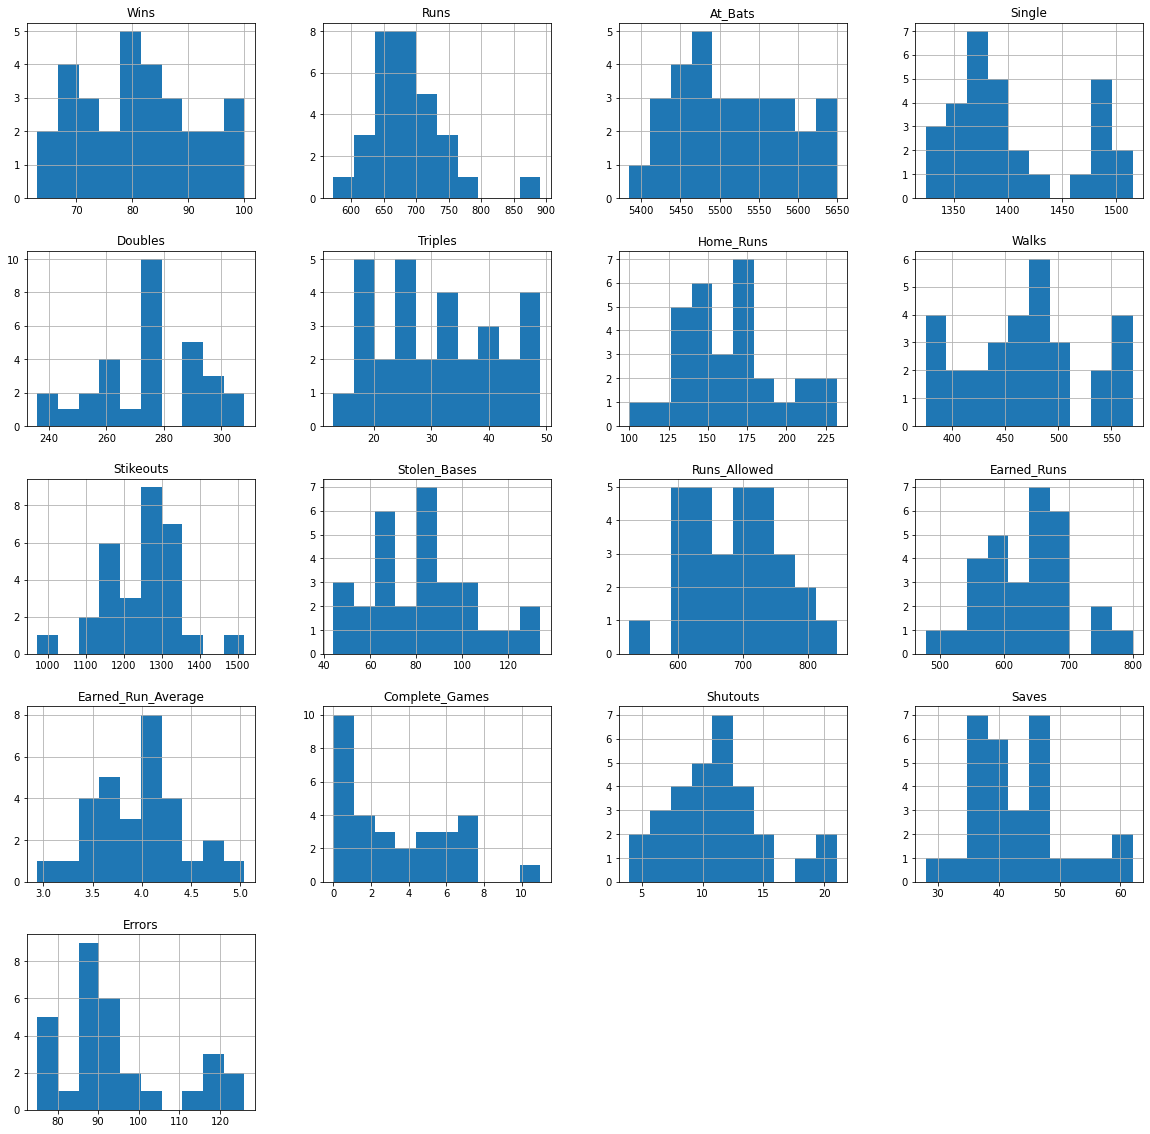

In [17]:
df.hist(figsize=(20,20))

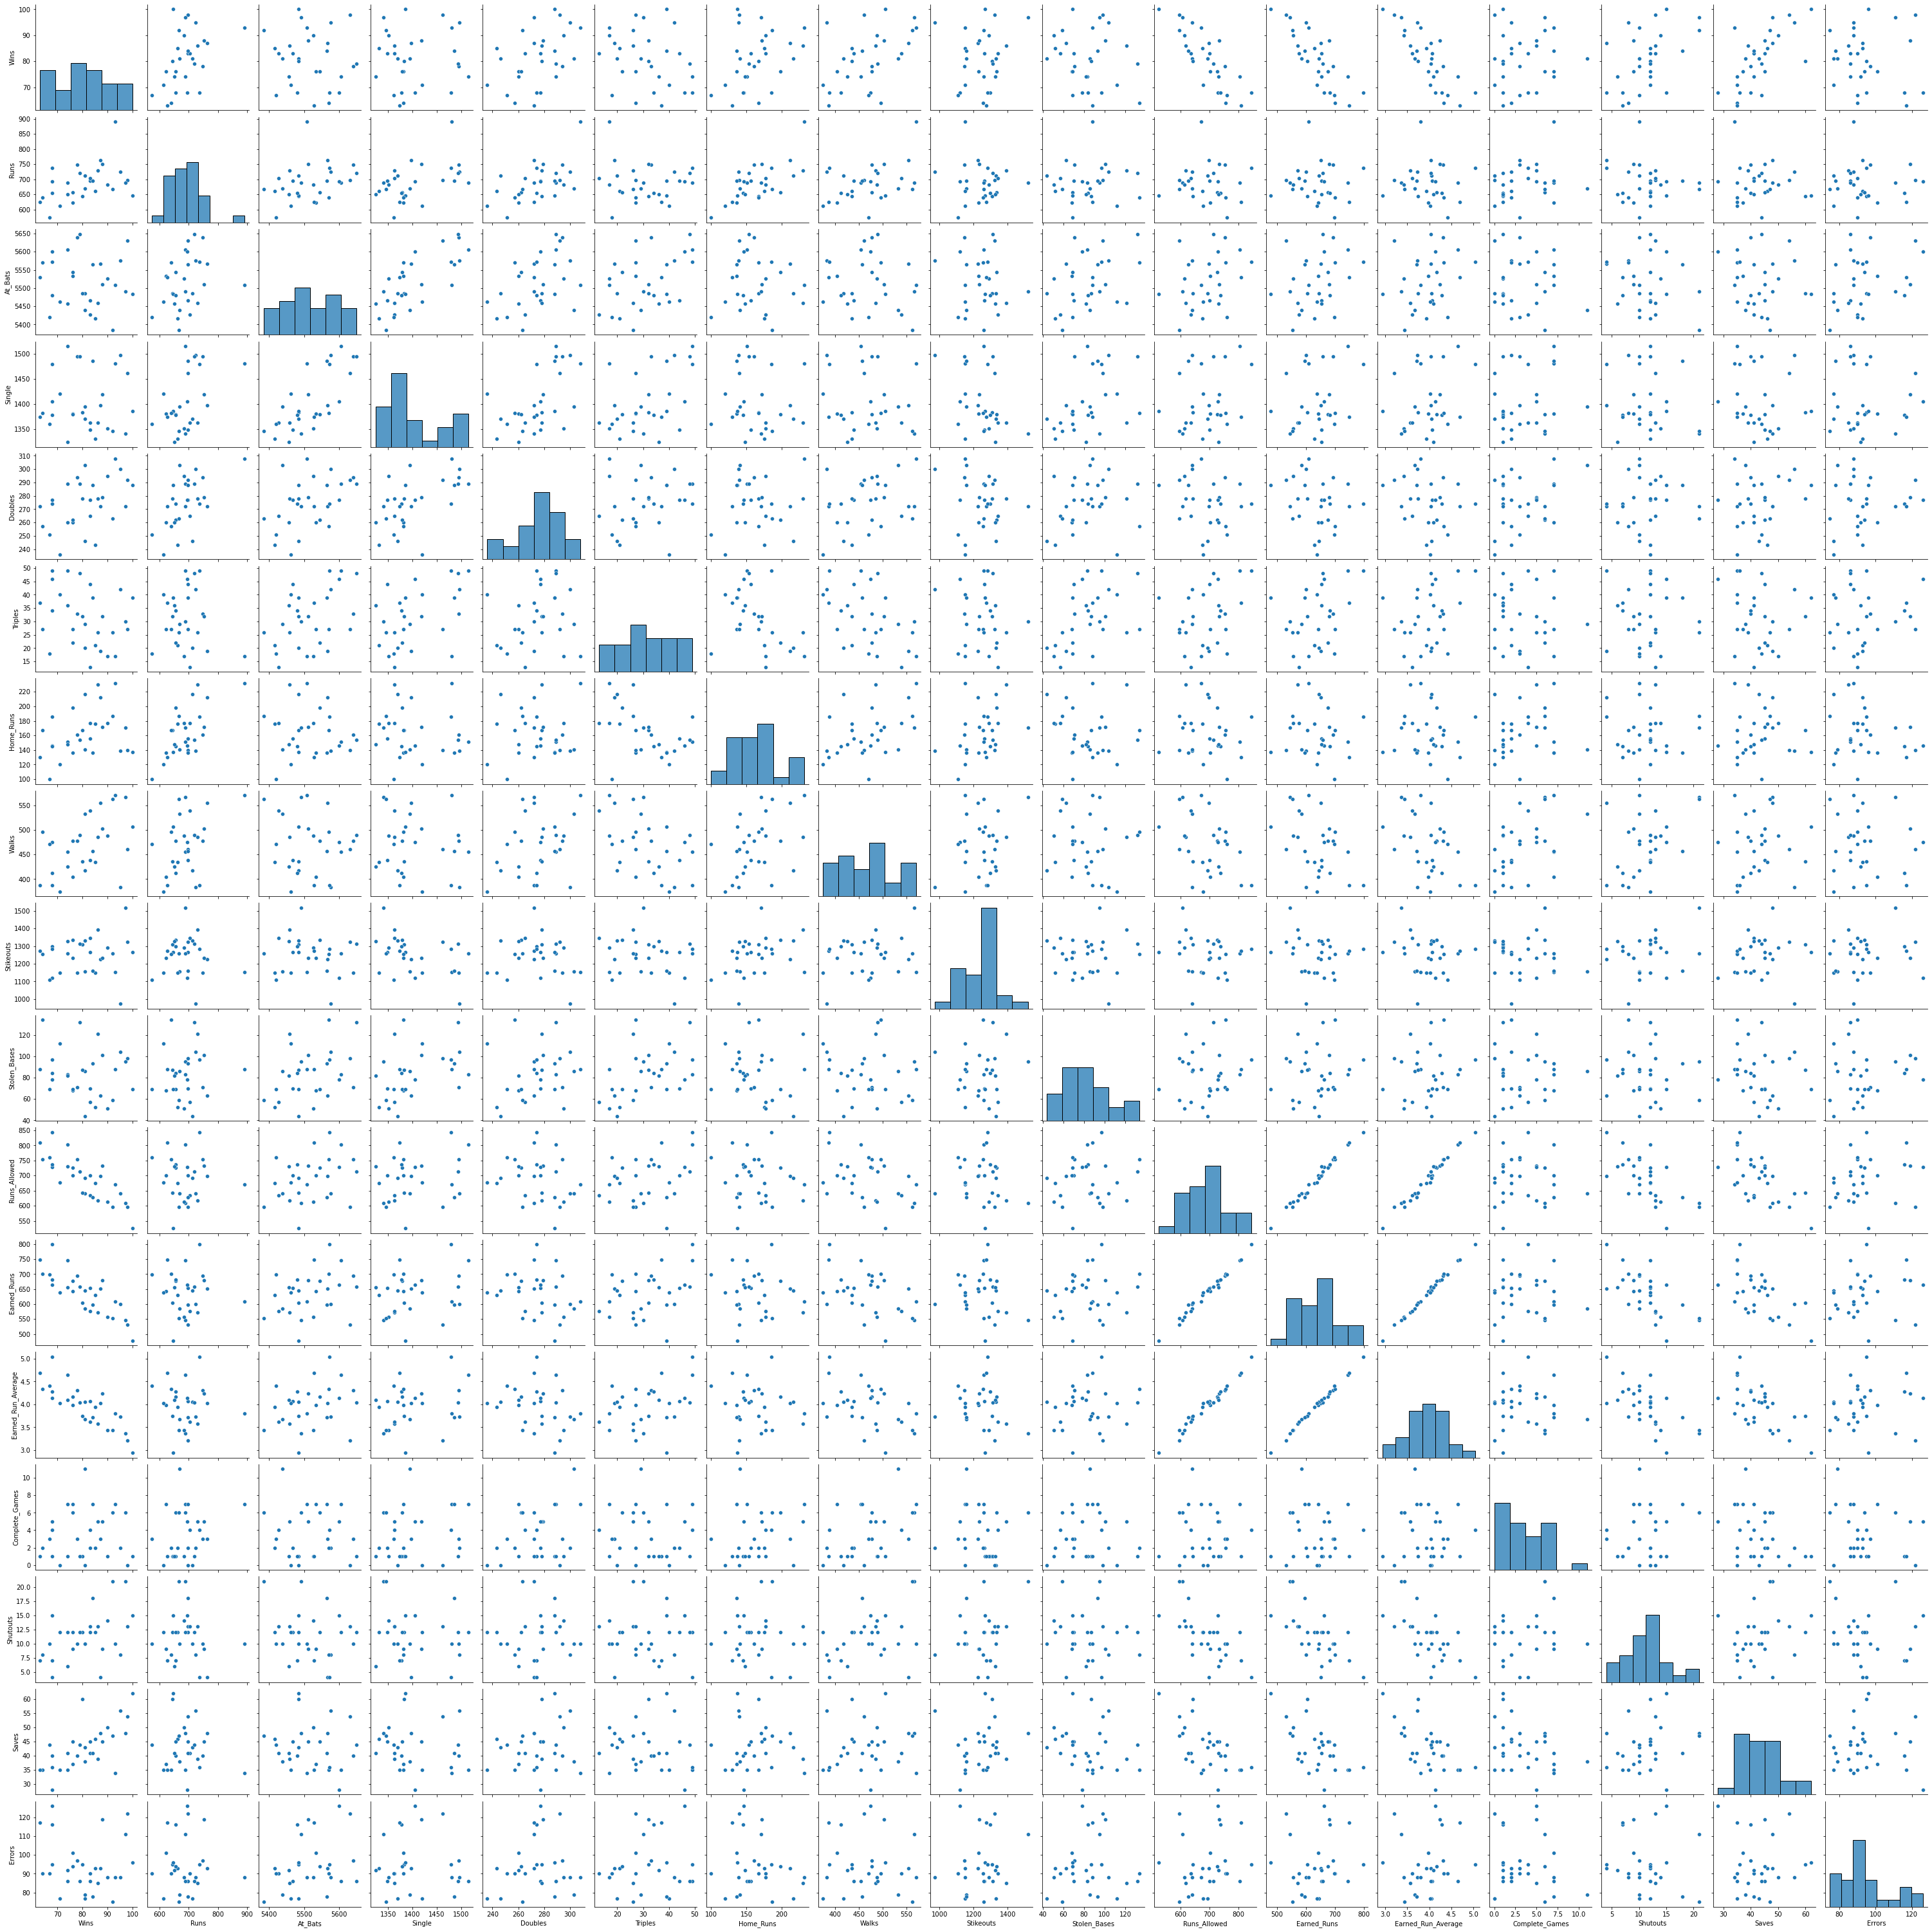

In [18]:
sns.pairplot(data=df)

# Checking Correlation:

In [19]:
df.corr()

,Wins,Runs,At_Bats,Single,Doubles,Triples,Home_Runs,Walks,Stikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average,Complete_Games,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At_Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Single,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home_Runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Stikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen_Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


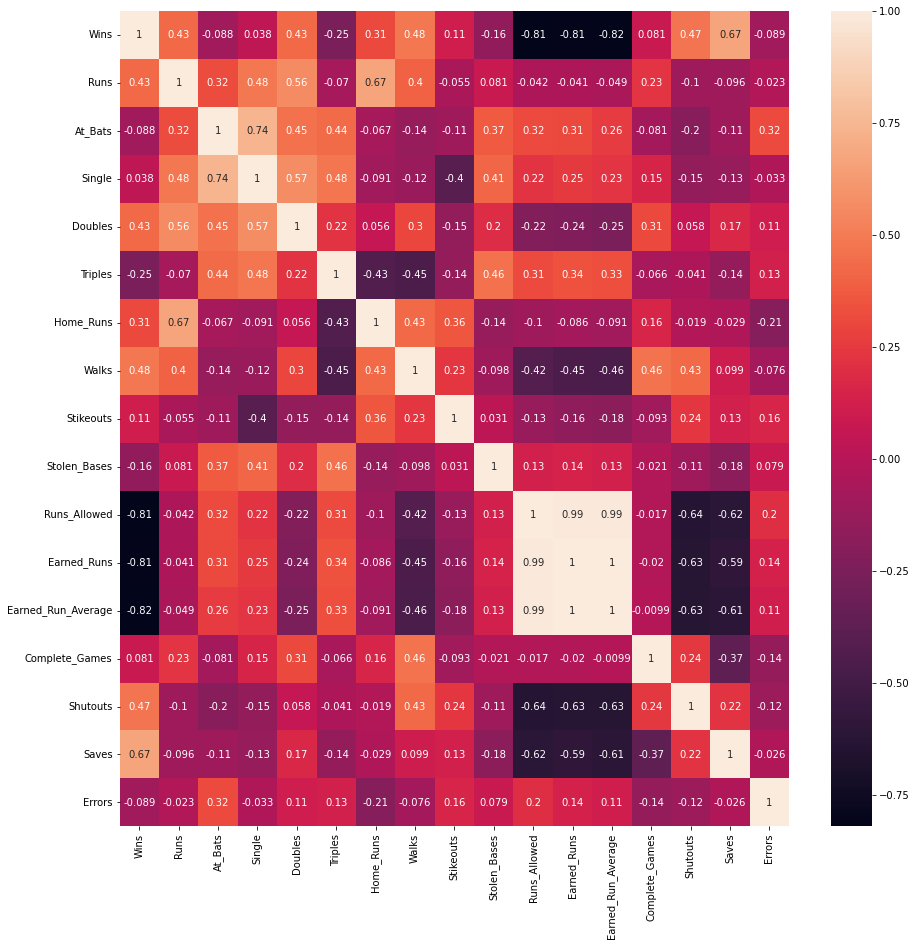

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [21]:
corr=df.corr()
corr['Wins'].sort_values(ascending=False)

Wins                  1.000000
Saves                 0.666530
Walks                 0.484342
Shutouts              0.471805
Runs                  0.430751
Doubles               0.427797
Home_Runs             0.307407
Stikeouts             0.111850
Complete_Games        0.080533
Single                0.037612
At_Bats              -0.087947
Errors               -0.089485
Stolen_Bases         -0.157234
Triples              -0.251118
Earned_Runs          -0.809435
Runs_Allowed         -0.812952
Earned_Run_Average   -0.819600
Name: Wins, dtype: float64

* Saves is highly positively correlated with Wins, Earned Run Average is highly negatively correlated with Wins.

* We can see that Earned Run Average and Earned Runs are highly positively correlated with Runs Allowed whereas Earned Run Average,Earned Runs and Runs Allowed is highly negatively correlated with Wins.

* Saves and Shutouts are negatively correlated with Run Average,Earned Runs and Runs Allowed, whereRun Average,Earned Runs and Runs Allowed are negatively correlated with wins.

# Removing Outliers

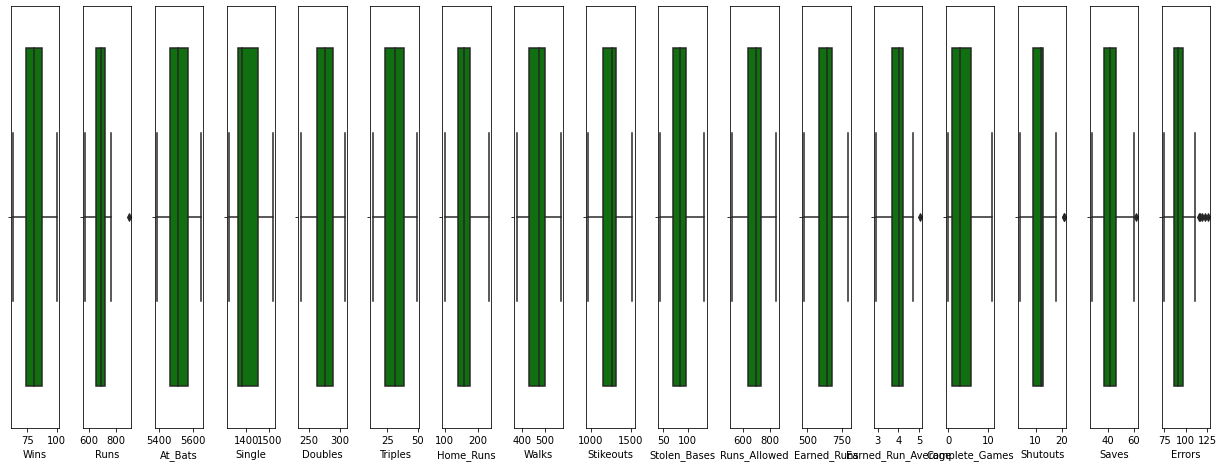

In [22]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()#fits all graphs in one single format

We can see only Errors column has outlier.

# Z-score Technique:

In [23]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(30, 17)

In [24]:
threshold=3
#index number
print(np.where(z>3))#returns index location of ouliers

(array([5], dtype=int64), array([1], dtype=int64))


In [25]:
len(np.where(z>3)[0])

1

In [26]:
z.iloc[5]

Wins                  1.170814
Runs                  3.509647
At_Bats               0.104884
Single                1.361089
Doubles               1.869832
Triples               1.391501
Home_Runs             2.185047
Walks                 1.798742
Stikeouts             0.952796
Stolen_Bases          0.200609
Runs_Allowed          0.257184
Earned_Runs           0.389104
Earned_Run_Average    0.350165
Complete_Games        1.300442
Shutouts              0.320914
Saves                 1.171848
Errors                0.461470
Name: 5, dtype: float64

In [27]:
#to drop Outliers;
df_new=df[(z<3).all(axis=1)]
print("old dataFrame",df.shape)
print("new dataFrame",df_new.shape)
print("total dropped rows",df.shape[0]-df_new.shape[0])

old dataFrame (30, 17)
new dataFrame (29, 17)
total dropped rows 1


# Percentage data loss:

In [28]:
loss_percent=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print(loss_percent,'%')

3.3333333333333335 %


# Skewness

In [29]:
df_new.skew() #we are checking skewness as we want the data to be normally distributed.

Wins                  0.119013
Runs                 -0.215364
At_Bats               0.169573
Single                0.783772
Doubles              -0.335304
Triples               0.090124
Home_Runs             0.450862
Walks                 0.151193
Stikeouts            -0.233815
Stolen_Bases          0.494966
Runs_Allowed          0.018155
Earned_Runs           0.018461
Earned_Run_Average    0.016693
Complete_Games        0.854980
Shutouts              0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

Skewness threshold taken +/-0.65.Columns which are having skewness-
Runs,Complete_Games,Errors,Single

Removing highly negatively correlated columns

In [30]:
df_new.drop(['Runs_Allowed','Earned_Run_Average','Earned_Runs'],axis=1,inplace=True)
df_new.shape

(29, 14)

Splitting the data

In [31]:
#independent col
x=df_new.drop('Wins',axis=1)
#target
y=df_new['Wins']
df2=pd.DataFrame(x,columns=x.columns)

# Transforming data to remove skewnessd

In [32]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e+00,  0.00000000e+00,
        -8.37664770e-01, -4.32227907e-01, -8.60039342e-01,
        -1.16272085e+00, -2.30682707e-01, -6.18421529e-01,
         1.26446344e+00, -5.13554932e

In [33]:
pd.DataFrame(x).skew()

0    -0.024842
1     0.000000
2     0.000000
3    -0.052793
4    -0.075139
5     0.000448
6    -0.008572
7     0.051530
8    -0.009570
9    -0.045947
10    0.000529
11   -0.000925
12    0.065585
dtype: float64

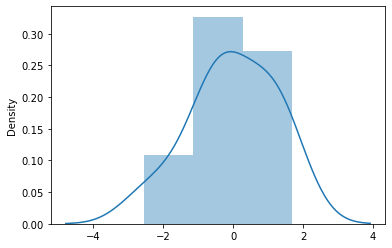

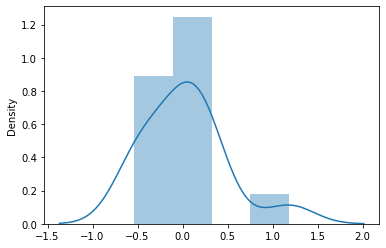

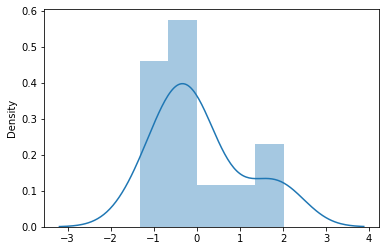

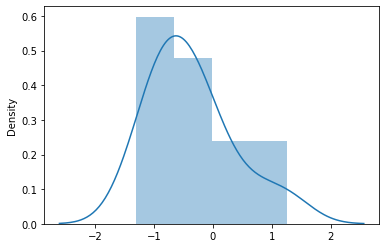

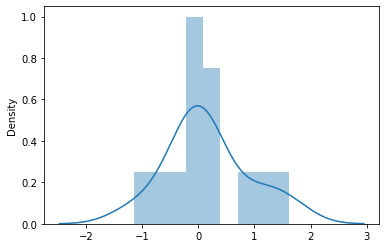

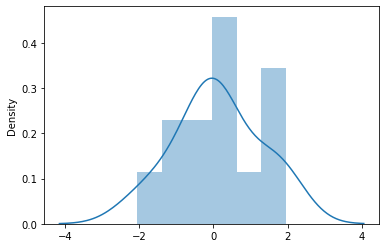

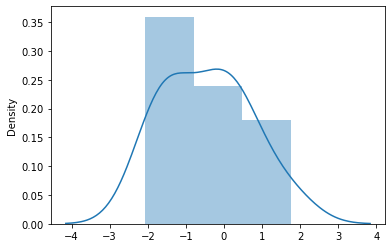

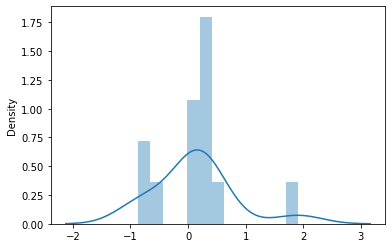

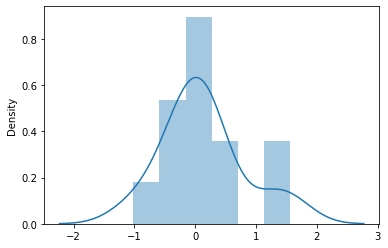

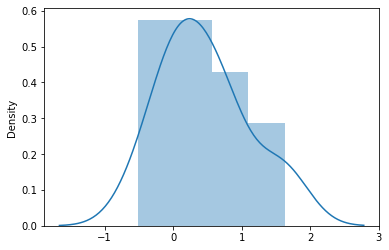

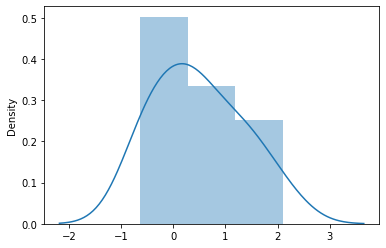

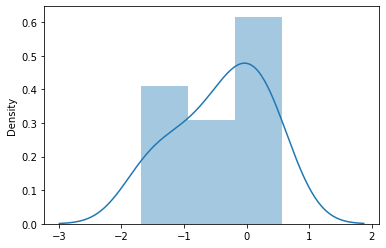

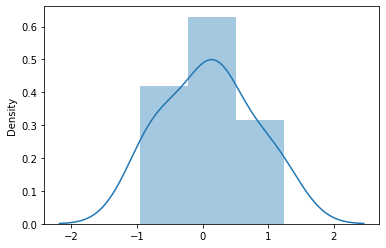

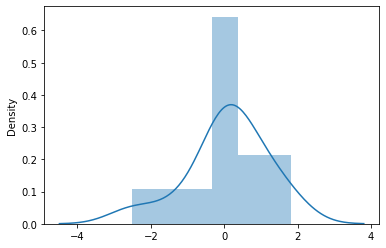

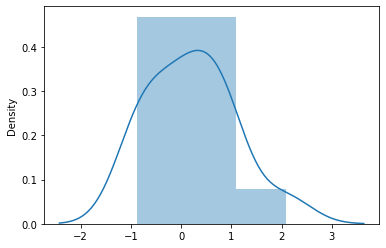

In [34]:
#Let's see the distribution for each column post transformation

for i in range(15):
    plt.figure()
    sns.distplot(x[i])

In [35]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(pd.DataFrame(x).values,i) for i in range(pd.DataFrame(x).shape[1])]
    vif["features"]=df2.columns
    print(vif)
    
vif_calc()    

    VIF Factor        features
0     3.696424            Runs
1          NaN         At_Bats
2          NaN          Single
3     2.274734         Doubles
4     2.592487         Triples
5     4.353744       Home_Runs
6     2.677772           Walks
7     2.218382       Stikeouts
8     1.600020    Stolen_Bases
9     1.847102  Complete_Games
10    1.687018        Shutouts
11    1.709521           Saves
12    1.318932          Errors


As all VIF values are below 10, we dont find multi-colinearity in the dataset.

In [36]:
from sklearn.preprocessing import StandardScaler # transforms data such that mean =0 and std dev=1
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e+00,  0.00000000e+00,
        -8.37664770e-01, -4.32227907e-01, -8.60039342e-01,
        -1.16272085e+00, -2.30682707e-01, -6.18421529e-01,
         1.26446344e+00, -5.13554932e

We can see skewness is removed, we can proceed with Model.

# Principal Component Analysis

<BarContainer object of 13 artists>

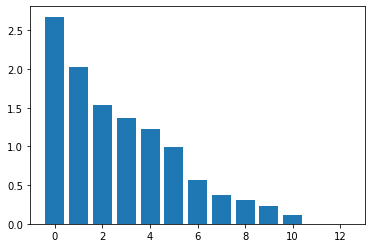

In [37]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)

In [38]:
pca_new = PCA(n_components=10)
x = pca_new.fit_transform(x)
print(x.shape)

(29, 10)


In [39]:
x

array([[ 2.19205029, -1.64849602, -0.2685644 ,  1.65707417, -2.59471657,
         0.07403465,  0.42657817, -0.09112768, -0.91483589,  0.60476906],
       [ 0.35414811, -0.23603012, -0.02618327,  0.43606748, -0.43451328,
         0.79975978, -0.95696498, -0.30820947, -0.03166777, -0.56989596],
       [-0.2590782 , -1.53671069,  2.31851173, -0.68129261, -1.14937317,
        -0.57426762,  1.14628029, -0.83563254,  1.00519001,  0.04326291],
       [ 1.19106507,  1.25568601,  0.66228308, -1.17365417,  0.3825596 ,
        -1.26789177, -0.26769384, -1.00968528, -0.39986404,  0.42628259],
       [ 0.72826222, -1.60279593,  1.112019  , -0.91194655,  0.00869561,
         0.43811471, -0.832911  , -0.74585791,  0.39584793, -0.32098819],
       [-2.27071266, -0.35277086, -2.00827456, -0.8575101 , -1.7126698 ,
        -1.08032063,  1.09687396,  0.3761131 , -0.05369667, -0.90527295],
       [-1.58995569,  2.56535819, -1.88577397, -0.65721906, -1.33528914,
         1.54863428, -1.03029942,  0.19171309

# Modelling

# KBest Features Selection:

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif
bestfeat=SelectKBest(score_func=f_classif,k=10)
fit=bestfeat.fit(x,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(df2.columns)
dfcolumns.head()
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Feature','Score']
print(featureScores.nlargest(10,'Score'))

          Feature     Score
4         Triples  7.518724
9  Complete_Games  4.055762
8    Stolen_Bases  3.807963
3         Doubles  2.902140
0            Runs  1.898736
5       Home_Runs  1.059301
1         At_Bats  0.751535
6           Walks  0.604702
7       Stikeouts  0.498985
2          Single  0.415033


In [41]:
#selecting best features for model
x_best=df2.drop(columns=['Walks','Stikeouts','Single'])

In [42]:
pd.DataFrame(x_best).head()

,Runs,At_Bats,Doubles,Triples,Home_Runs,Stolen_Bases,Complete_Games,Shutouts,Saves,Errors
0,724,5575,300,42,139,104,2,8,56,88
1,696,5467,277,44,156,70,2,12,45,86
2,669,5439,303,29,141,86,11,10,38,79
3,622,5533,260,27,136,68,7,9,37,101
4,689,5605,289,49,151,83,7,12,35,86


In [43]:
#transforming the label data using scaling
x_best_scl=sc.fit_transform(x_best)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Finding best random state

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

maxAccu=0 #max accuracy
maxRS=0   #best random state value for which max accuracy is achieved

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x_best_scl, y, test_size=0.25, random_state=i)
    lm=LinearRegression()
    lm.fit(x_train, y_train)
    pred = lm.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
        

print("Best R2 score is", maxAccu,"at Random State",maxRS)
print('At random state', maxRS,'lm training score is: ', round(lm.score(x_train, y_train),4))
print('At random state', maxRS,'lm testing score is: ', round(lm.score(x_test, y_test),4))

Best R2 score is 0.9447365418183735 at Random State 116
At random state 116 lm training score is:  0.8711
At random state 116 lm testing score is:  0.7766


# Different Models

In [46]:
# Spliting test and training data
x_train,x_test,y_train,y_test=train_test_split(x_best_scl,y,test_size=0.25,random_state=116)    

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()




model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model]

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print("cross Validation score of ",m ," is ",abs(cross_val_score(m,x,y,cv=5, scoring='neg_mean_squared_error').mean()))
    print('\n\n')

mean_absolute_error of  LinearRegression() model 2.1632020378972463
mean_square_error of LinearRegression() model 6.900160848896513
R2 Score of LinearRegression() model 94.47365418183735
cross Validation score of  LinearRegression()  is  63.62046761721526



mean_absolute_error of  Ridge() model 2.4658215421754424
mean_square_error of Ridge() model 7.872208677316827
R2 Score of Ridge() model 93.69514009074862
cross Validation score of  Ridge()  is  60.497114847412135



mean_absolute_error of  Lasso() model 3.7905425513366957
mean_square_error of Lasso() model 19.7162564286328
R2 Score of Lasso() model 84.20923024111502
cross Validation score of  Lasso()  is  59.10862569629724



mean_absolute_error of  DecisionTreeRegressor() model 8.125
mean_square_error of DecisionTreeRegressor() model 104.625
R2 Score of DecisionTreeRegressor() model 16.20573144787887
cross Validation score of  DecisionTreeRegressor()  is  98.24000000000001



mean_absolute_error of  SVR() model 9.231482819973532
m

We can see that Linear Regression is providing the best r2_score of 94%.

# Hyper Parameter Tuning

In [49]:
param = {'normalize':[True,False],'fit_intercept':[True,False],'copy_X':[True,False],'n_jobs':[1,2,3,4,5,67,8,9,10]}

grid = GridSearchCV(LinearRegression(), param, cv=5)
grid.fit(x_train, y_train)
grid.best_params_  #Best parameters
grid_pred=grid.best_estimator_.predict(x_test)
r2_score(y_test, grid_pred)

0.9447365418183736

In [50]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}

In [51]:
lr = LinearRegression(copy_X=True,normalize=True,fit_intercept=True,n_jobs=1)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
R2_Score=r2_score(y_test,predlr)
print("R2 score for the Best Model is:", R2_Score)

R2 score for the Best Model is: 0.9447365418183736


# Saving the Best Model

In [52]:
#saved model using joblib library
import joblib
filename = "Baseball"
joblib.dump(lr, filename)

['Baseball']

# Conclusion

In [53]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predlr},index=range(len(a)))
df_com

,original,Predicted
0,81,80.674099
1,97,95.485392
2,95,90.885353
3,64,65.247003
4,74,71.032860
5,83,87.763239
6,87,85.751856
7,68,69.124935


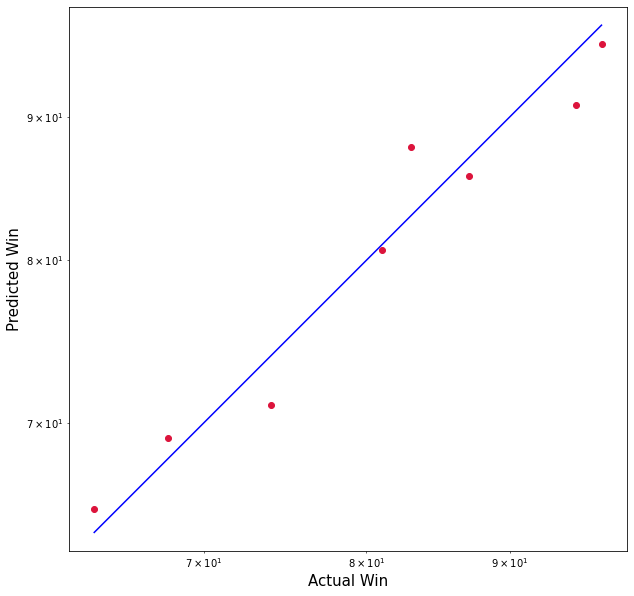

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predlr, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(predlr), max(a))
p2 = min(min(predlr), min(a))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Win', fontsize=15)
plt.ylabel('Predicted Win', fontsize=15)
plt.axis('equal')
plt.show()